<a href="https://colab.research.google.com/github/Ousoka/prix_voiture_audi_dl/blob/master/Car_Price_MMN_OK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import pandas as pd

url = "https://raw.githubusercontent.com/Ousoka/prix_voiture_audi_dl/master/prix_voiture_audi.xls"
df = pd.read_excel(url)


In [7]:
df.head()

,model,annee,prix,transmission,miles,carburant,taxe,distance,moteur
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0




*   *model :* type de véhicule
*   *années :* années de sortie
*   *prix :*
*   *transmission :* manuelle/automatic/semi-automatic
*   *miles :* distance parcourue
*   *carburant :* petrol/diesel
*   *taxe :* taxe véhicule
*   *distance :*





### **Démarche**

1.   Identifier la nature du problème
2.   Comprendre la nature de chacune des variables
3.   Identifier la variable cible
4.   Savoir l'espace mémoire qu'occupe l'ensemble de mes données
5.   Vérifier la présence de doublons et les supprimer
6.   Revérifir avec shape
7.   Séparer les colonnes numériques des colonnes catégorielles et afficher pour vérification
8. EDA (hispogramme)
9. L'encodage des variables catégorielles

In [8]:
df.columns

Index(['model', 'annee', 'prix', 'transmission', 'miles', 'carburant', 'taxe',
       'distance', 'moteur'],
      dtype='object')

*   x = transmission, miles, carburant, taxe, distance, moteur
*   Y = prix

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   annee         10668 non-null  int64  
 2   prix          10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   miles         10668 non-null  int64  
 5   carburant     10668 non-null  object 
 6   taxe          10668 non-null  int64  
 7   distance      10668 non-null  float64
 8   moteur        10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [10]:
df.shape

(10668, 9)

In [11]:
# Appliquer un masque pour enlever les données dupliquées
df = df[~df.duplicated()]

In [12]:
df.shape

(10565, 9)

In [13]:
no_col_num = df.select_dtypes(include='object').columns
no_col_num

Index(['model', 'transmission', 'carburant'], dtype='object')

In [14]:
col_num = df.select_dtypes(exclude='object').columns
col_num

Index(['annee', 'prix', 'miles', 'taxe', 'distance', 'moteur'], dtype='object')

In [15]:
df["transmission"].value_counts()

,count
transmission,
Manual,4317
Semi-Auto,3568
Automatic,2680


In [16]:
df["model"].value_counts()

,count
model,
A3,1917
Q3,1379
A4,1375
A1,1337
A5,874
Q5,864
Q2,810
A6,748
Q7,394


In [17]:
df["annee"].value_counts()

,count
annee,
2019,3139
2016,1959
2017,1932
2015,995
2018,860
2020,689
2014,446
2013,290
2012,85


In [18]:
df["carburant"].value_counts()

,count
carburant,
Diesel,5537
Petrol,5000
Hybrid,28


In [19]:
pd.crosstab(df["carburant"], df["transmission"])

transmission,Automatic,Manual,Semi-Auto
carburant,,,
Diesel,1650,2101,1786
Hybrid,12,0,16
Petrol,1018,2216,1766


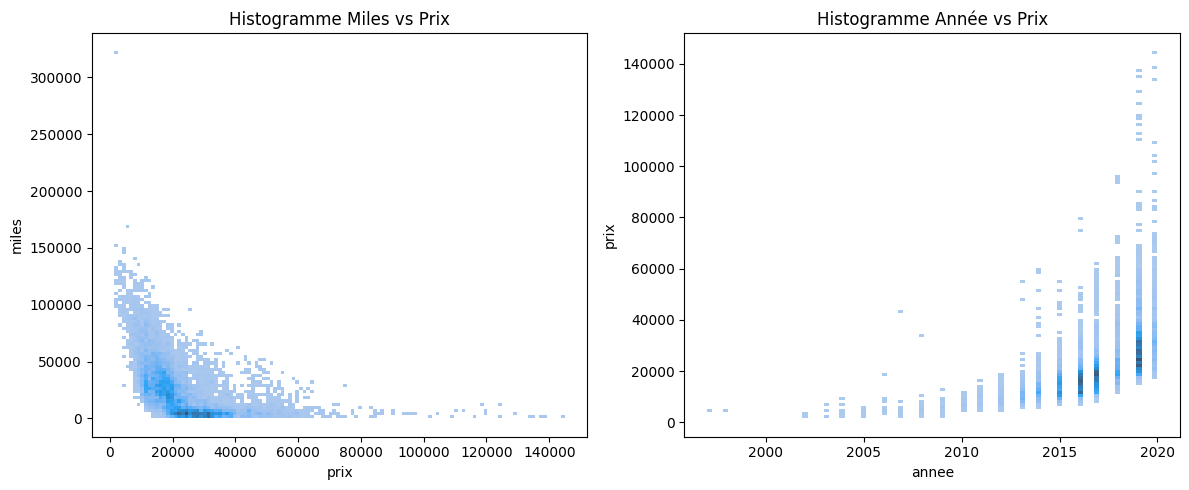

In [20]:
# prompt: histogramme entre "miles" et "prix" entre "annees" et "prix"

# Assuming 'df' is your DataFrame as defined in the previous code.
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x="prix", y="miles", kde=True)
plt.title("Histogramme Miles vs Prix")

plt.subplot(1, 2, 2)
sns.histplot(data=df, x="annee", y="prix", kde=True)
plt.title("Histogramme Année vs Prix")

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


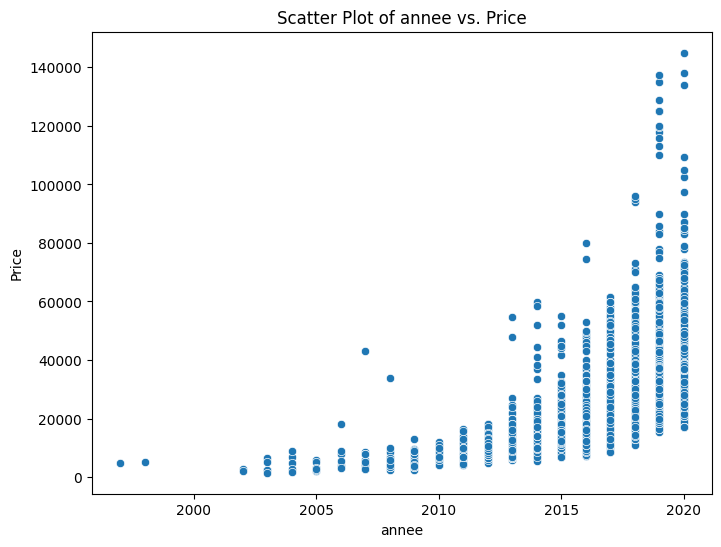

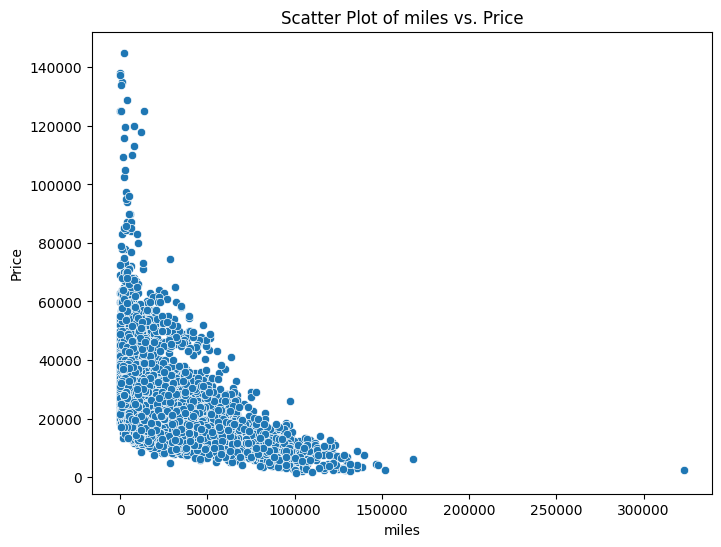

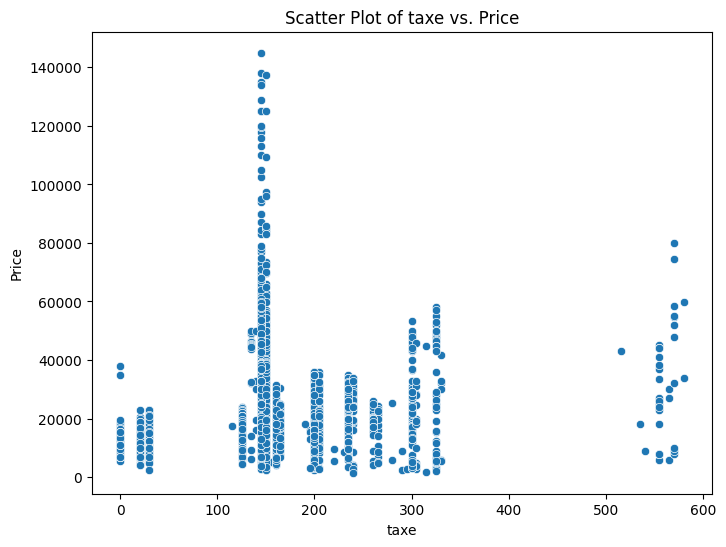

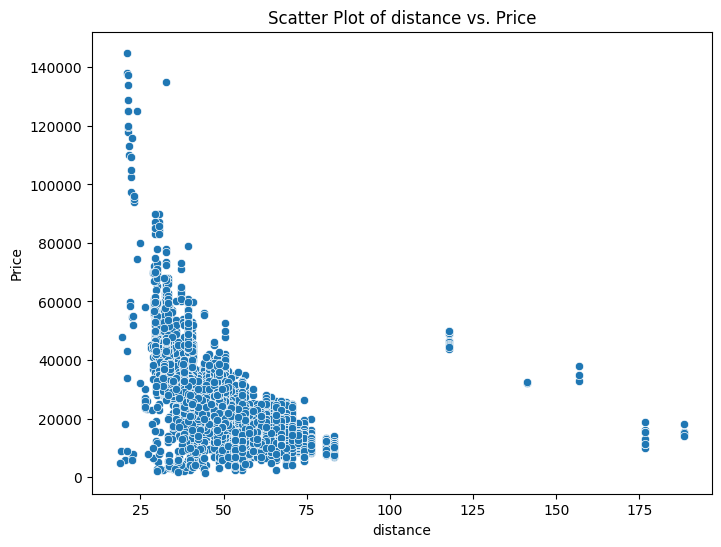

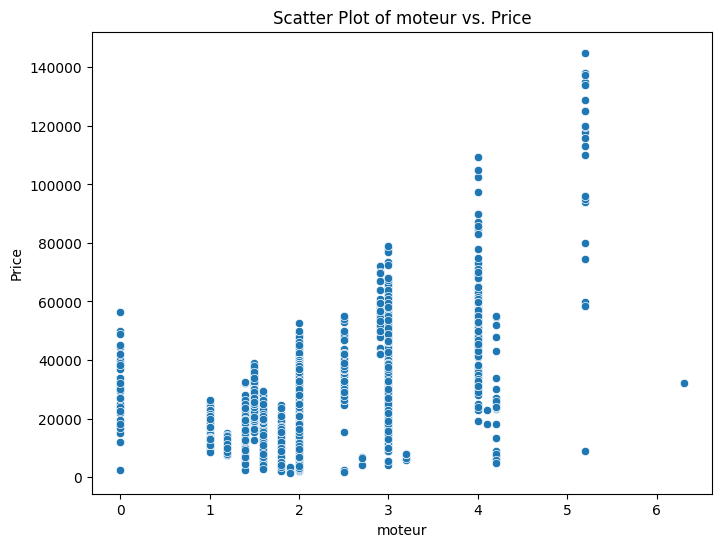

In [21]:
for col in col_num:
  if col != 'prix':
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=col, y='prix')
    plt.title(f'Scatter Plot of {col} vs. Price')
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.show()


*   le pourcentage de vente de véhicule pour chaque modèle
*   Les models qui représentent plus de 80% des ventes

In [22]:
# le pourcentage de vente de véhicule pour chaque modèle
model_counts = df['model'].value_counts()
total_models = len(df['model'])
model_percentages = (model_counts / total_models) * 100
print(model_percentages)

model
A3     18.144818
Q3     13.052532
A4     13.014671
A1     12.654993
A5      8.272598
Q5      8.177946
Q2      7.666824
A6      7.079981
Q7      3.729295
TT      3.180312
A7      1.154756
A8      1.116895
Q8      0.653100
RS6     0.369143
RS3     0.312352
RS4     0.293422
R8      0.265026
RS5     0.265026
S3      0.170374
SQ5     0.151443
S4      0.113583
SQ7     0.075722
S8      0.037861
S5      0.028396
A2      0.009465
RS7     0.009465
Name: count, dtype: float64


In [23]:
model_price_sales = df.groupby('model')['prix'].agg(['count', 'sum'])
model_price_sales.reset_index(inplace=True)
print(model_price_sales)

   model  count       sum
0     A1   1337  19085315
1     A2      1      2490
2     A3   1917  33389504
3     A4   1375  27832708
4     A5    874  20555833
5     A6    748  16976148
6     A7    122   3521593
7     A8    118   4127858
8     Q2    810  18216850
9     Q3   1379  31555602
10    Q5    864  26235946
11    Q7    394  17614493
12    Q8     69   4147936
13    R8     28   2734262
14   RS3     33   1123667
15   RS4     31   1554700
16   RS5     28   1419701
17   RS6     39   2182591
18   RS7      1     33490
19    S3     18    366830
20    S4     12    374977
21    S5      3     47940
22    S8      4    135231
23   SQ5     16    502653
24   SQ7      8    394152
25    TT    336   7319576


In [24]:
model_price_sales['average_price'] = model_price_sales['sum'] / model_price_sales['count']
print(model_price_sales)

   model  count       sum  average_price
0     A1   1337  19085315   14274.730740
1     A2      1      2490    2490.000000
2     A3   1917  33389504   17417.581638
3     A4   1375  27832708   20241.969455
4     A5    874  20555833   23519.259725
5     A6    748  16976148   22695.385027
6     A7    122   3521593   28865.516393
7     A8    118   4127858   34981.847458
8     Q2    810  18216850   22489.938272
9     Q3   1379  31555602   22882.960116
10    Q5    864  26235946   30365.678241
11    Q7    394  17614493   44706.835025
12    Q8     69   4147936   60115.014493
13    R8     28   2734262   97652.214286
14   RS3     33   1123667   34050.515152
15   RS4     31   1554700   50151.612903
16   RS5     28   1419701   50703.607143
17   RS6     39   2182591   55963.871795
18   RS7      1     33490   33490.000000
19    S3     18    366830   20379.444444
20    S4     12    374977   31248.083333
21    S5      3     47940   15980.000000
22    S8      4    135231   33807.750000
23   SQ5     16 

In [25]:
model_price_sales['sales_percentage'] = (model_price_sales['count'] / model_price_sales['count'].sum()) * 100
model_price_sales.sort_values(by='sales_percentage', ascending=False, inplace=True)

print(model_price_sales)


   model  count       sum  average_price  sales_percentage
2     A3   1917  33389504   17417.581638         18.144818
9     Q3   1379  31555602   22882.960116         13.052532
3     A4   1375  27832708   20241.969455         13.014671
0     A1   1337  19085315   14274.730740         12.654993
4     A5    874  20555833   23519.259725          8.272598
10    Q5    864  26235946   30365.678241          8.177946
8     Q2    810  18216850   22489.938272          7.666824
5     A6    748  16976148   22695.385027          7.079981
11    Q7    394  17614493   44706.835025          3.729295
25    TT    336   7319576   21784.452381          3.180312
6     A7    122   3521593   28865.516393          1.154756
7     A8    118   4127858   34981.847458          1.116895
12    Q8     69   4147936   60115.014493          0.653100
17   RS6     39   2182591   55963.871795          0.369143
14   RS3     33   1123667   34050.515152          0.312352
15   RS4     31   1554700   50151.612903          0.2934

In [26]:
# Les models qui représentent plus de 80% des ventes
threshold = 80
filtered_models = model_price_sales['sales_percentage'][model_price_sales['sales_percentage'] > threshold]
print(filtered_models)


Series([], Name: sales_percentage, dtype: float64)


In [27]:
# prompt: Les models qui représentent plus de 80% des ventes

# Les models qui représentent plus de 80% des ventes
cumulative_percentage = model_price_sales['sales_percentage'].cumsum()
models_over_80 = model_price_sales[cumulative_percentage <= 80]
models_over_80


,model,count,sum,average_price,sales_percentage
2,A3,1917,33389504,17417.581638,18.144818
9,Q3,1379,31555602,22882.960116,13.052532
3,A4,1375,27832708,20241.969455,13.014671
0,A1,1337,19085315,14274.730740,12.654993
4,A5,874,20555833,23519.259725,8.272598
10,Q5,864,26235946,30365.678241,8.177946


In [28]:
df[df["prix"] == df["prix"].max()]

,model,annee,prix,transmission,miles,carburant,taxe,distance,moteur
4783,R8,2020,145000,Semi-Auto,2000,Petrol,145,21.1,5.2


In [29]:
# Encodage, selection de variable,

In [30]:
for col in no_col_num:
  print(f"Values for column '{col}':")
  print(df[col].unique())
  print("-" * 70)


Values for column 'model':
[' A1' ' A6' ' A4' ' A3' ' Q3' ' Q5' ' A5' ' S4' ' Q2' ' A7' ' TT' ' Q7'
 ' RS6' ' RS3' ' A8' ' Q8' ' RS4' ' RS5' ' R8' ' SQ5' ' S8' ' SQ7' ' S3'
 ' S5' ' A2' ' RS7']
----------------------------------------------------------------------
Values for column 'transmission':
['Manual' 'Automatic' 'Semi-Auto']
----------------------------------------------------------------------
Values for column 'carburant':
['Petrol' 'Diesel' 'Hybrid']
----------------------------------------------------------------------


In [31]:
# Create a dictionary to store the mappings
mappings = {}

for col in ['model', 'transmission', 'carburant']:
    # Fit Target Encoding
    means = df.groupby(col)['prix'].mean()
    mappings[col] = means

# Apply Target Encoding
for col, means in mappings.items():
    df[col + '_encoded'] = df[col].map(means)

# Example usage to get inverse mapping for 'model'
def inverse_mapping(encoded_value, col):
  for key, value in mappings[col].items():
      if value == encoded_value:
          return key
  return None  # Return None if no match is found

# Example usage
example_encoded_value = df['model_encoded'].iloc[0]
example_encoded_value1 = df['transmission_encoded'].iloc[0]
original_value = inverse_mapping(example_encoded_value, 'model')
original_value1 = inverse_mapping(example_encoded_value1, 'transmission')
print(f"Encoded value: {example_encoded_value}, Original value: {original_value}")
print(f"Encoded value: {example_encoded_value1}, Original value: {original_value1}")


Encoded value: 14274.730740463725, Original value:  A1
Encoded value: 16024.305304609683, Original value: Manual


In [32]:
df

,model,annee,prix,transmission,miles,carburant,taxe,distance,moteur,model_encoded,transmission_encoded,carburant_encoded
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,14274.730740,16024.305305,22431.641800
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,22695.385027,28157.134328,23198.206249
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,14274.730740,16024.305305,22431.641800
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,20241.969455,28157.134328,23198.206249
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,17417.581638,16024.305305,22431.641800
...,...,...,...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0,17417.581638,16024.305305,22431.641800
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0,17417.581638,16024.305305,22431.641800
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0,17417.581638,16024.305305,22431.641800
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4,22882.960116,28157.134328,22431.641800


In [33]:
# prompt: maintenant label encoder

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoders = {}

for col in ['model', 'transmission','carburant']:
    le = LabelEncoder()
    df[col + '_encoded'] = le.fit_transform(df[col])
    label_encoders[col] = le

# Example usage to get inverse mapping for 'model'
def inverse_mapping_label(encoded_value, col):
  return label_encoders[col].inverse_transform([encoded_value])[0]

# Example usage
example_encoded_value = df['model_encoded'].iloc[0]
original_value = inverse_mapping_label(example_encoded_value, 'model')
print(f"Encoded value: {example_encoded_value}, Original value: {original_value}")

df


Encoded value: 0, Original value:  A1


,model,annee,prix,transmission,miles,carburant,taxe,distance,moteur,model_encoded,transmission_encoded,carburant_encoded
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,0,1,2
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,5,0,0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,0,1,2
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,3,0,0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0,2,1,2
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0,2,1,2
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0,2,1,2
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4,9,0,2


In [34]:
df_selected = df.drop(['model', 'transmission', 'carburant'], axis=1)



In [35]:
from sklearn.model_selection import train_test_split

X = df_selected.drop('prix', axis=1)
y = df_selected['prix']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8452, 8)
y_train shape: (8452,)
X_test shape: (2113, 8)
y_test shape: (2113,)


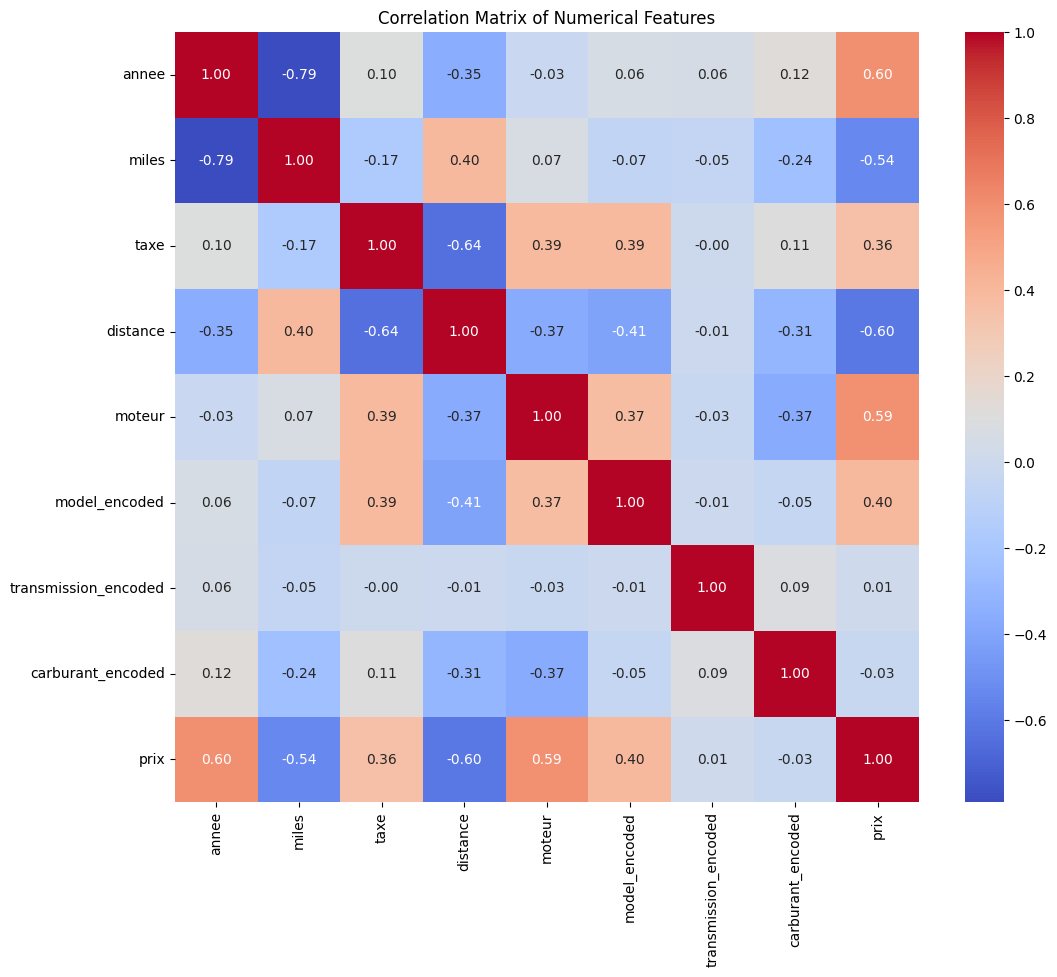

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

df_train = pd.concat([X_train, y_train], axis=1)
correlation_matrix = df_train.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


In [37]:
from scipy import stats

p_values = {}
for col in df_train.columns:
    if col != 'prix':
        correlation, p_value = stats.pearsonr(df_train['prix'], df_train[col])
        p_values[col] = p_value

print("P-values for correlation with 'prix':")
for col, p_value in p_values.items():
    print(f"{col}: {p_value}")
    print(f"{col}: {p_value > 0.005}")


P-values for correlation with 'prix':
annee: 0.0
annee: False
miles: 0.0
miles: False
taxe: 1.6217698266893524e-249
taxe: False
distance: 0.0
distance: False
moteur: 0.0
moteur: False
model_encoded: 8.285868e-317
model_encoded: False
transmission_encoded: 0.2928317741995821
transmission_encoded: True
carburant_encoded: 0.003588278664004614
carburant_encoded: False


In [38]:
from scipy import stats

correlation_coefficient, p_value = stats.pearsonr(X_train['annee'], y_train)

print(f"Correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

for col in X_train.columns:
  correlation_coefficient, p_value = stats.pearsonr(X_train[col], y_train)
  print(f"For {col}:")
  print(f"Correlation coefficient: {correlation_coefficient}")
  print(f"P-value: {p_value}")


Correlation coefficient: 0.595553256478963
P-value: 0.0
For annee:
Correlation coefficient: 0.595553256478963
P-value: 0.0
For miles:
Correlation coefficient: -0.5367049343278658
P-value: 0.0
For taxe:
Correlation coefficient: 0.3550075356758553
P-value: 1.6217698266893524e-249
For distance:
Correlation coefficient: -0.6024732382973674
P-value: 0.0
For moteur:
Correlation coefficient: 0.5924324515341534
P-value: 0.0
For model_encoded:
Correlation coefficient: 0.39683616803161403
P-value: 8.285868e-317
For transmission_encoded:
Correlation coefficient: 0.011443451143926689
P-value: 0.2928317741995821
For carburant_encoded:
Correlation coefficient: -0.03167416258633197
P-value: 0.003588278664004614


In [39]:
X_train = X_train.drop(['transmission_encoded'], axis=1)
X_test = X_test.drop(['transmission_encoded'], axis=1)

In [40]:
X_train.head()

,annee,miles,taxe,distance,moteur,model_encoded,carburant_encoded
9427,2019,10,145,33.6,3.0,11,0
9395,2019,8065,145,50.4,2.0,4,0
335,2019,2257,145,52.3,1.6,2,0
1624,2016,29819,0,67.3,1.0,0,2
5181,2014,28510,125,57.6,2.0,3,0


In [41]:

from sklearn.preprocessing import StandardScaler

# Assuming X_train and X_test are your training and testing dataframes
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to your training data
scaler.fit(X_train)

# Transform both training and testing data using the fitted scaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) #On transforme avec la moyenne et l'écart-type du train

# Convert the scaled data back to dataframes (optional but recommended)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


In [42]:
X_train

,annee,miles,taxe,distance,moteur,model_encoded,carburant_encoded
9427,2019,10,145,33.6,3.0,11,0
9395,2019,8065,145,50.4,2.0,4,0
335,2019,2257,145,52.3,1.6,2,0
1624,2016,29819,0,67.3,1.0,0,2
5181,2014,28510,125,57.6,2.0,3,0
...,...,...,...,...,...,...,...
5804,2019,6105,150,50.4,2.0,2,0
5252,2019,6366,145,32.5,2.0,9,2
5452,2013,49600,260,41.5,3.0,10,0
863,2020,525,145,40.9,1.5,9,2


In [43]:
# prompt: verifier que les variables sont bien ordonnées

# Assuming 'df' is your DataFrame as defined in the previous code.
# ... (your existing code)

# Check the order of columns after all transformations
print(df_selected.columns)

#Check the order of columns in X_train_scaled and X_test_scaled
print(X_train_scaled.columns)
print(X_test_scaled.columns)


# Check if the columns in X_train_scaled and X_test_scaled are identical after dropping the 'transmission_encoded' column
if list(X_train_scaled.columns) == list(X_test_scaled.columns):
    print("The columns in X_train_scaled and X_test_scaled are identical.")
else:
    print("The columns in X_train_scaled and X_test_scaled are NOT identical.")
    print("X_train_scaled columns:", X_train_scaled.columns)
    print("X_test_scaled columns:", X_test_scaled.columns)


# Check for data types in X_train_scaled and X_test_scaled
print("Data types of X_train_scaled columns:")
print(X_train_scaled.dtypes)
print("\nData types of X_test_scaled columns:")
X_test_scaled.dtypes


Index(['annee', 'prix', 'miles', 'taxe', 'distance', 'moteur', 'model_encoded',
       'transmission_encoded', 'carburant_encoded'],
      dtype='object')
Index(['annee', 'miles', 'taxe', 'distance', 'moteur', 'model_encoded',
       'carburant_encoded'],
      dtype='object')
Index(['annee', 'miles', 'taxe', 'distance', 'moteur', 'model_encoded',
       'carburant_encoded'],
      dtype='object')
The columns in X_train_scaled and X_test_scaled are identical.
Data types of X_train_scaled columns:
annee                float64
miles                float64
taxe                 float64
distance             float64
moteur               float64
model_encoded        float64
carburant_encoded    float64
dtype: object

Data types of X_test_scaled columns:


,0
annee,float64
miles,float64
taxe,float64
distance,float64
moteur,float64
model_encoded,float64
carburant_encoded,float64


In [44]:
# Lineaire regression
# Decision tree regressor
# KNN
# XGBoost
# Calculer le r2_score

# Lineaire regression

In [45]:
# prompt: # Lineaire regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2}")


R-squared score: 0.7854899476390504


In [46]:
# prompt: # Decision tree regressor

from sklearn.tree import DecisionTreeRegressor

# Initialize the decision tree regressor model
tree_model = DecisionTreeRegressor(random_state=42)

# Train the model
tree_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_tree = tree_model.predict(X_test_scaled)

# Calculate the R-squared score for the decision tree model
r2_tree = r2_score(y_test, y_pred_tree)
print(f"Decision Tree R-squared score: {r2_tree}")


Decision Tree R-squared score: 0.9054604388633717


In [47]:
# prompt: # KNN

from sklearn.neighbors import KNeighborsRegressor

# Initialize the KNN regressor model
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors

# Train the model
knn_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test_scaled)

# Calculate the R-squared score for the KNN model
r2_knn = r2_score(y_test, y_pred_knn)
print(f"KNN R-squared score: {r2_knn}")


KNN R-squared score: 0.9370109139280004


In [48]:
# prompt: # XGBoost

import xgboost as xgb

# Initialize the XGBoost regressor model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)  # Use 'reg:squarederror' for regression

# Train the model
xgb_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Calculate the R-squared score for the XGBoost model
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost R-squared score: {r2_xgb}")


XGBoost R-squared score: 0.9533146619796753


In [49]:
importances = xgb_model.feature_importances_
feature_names = X_train_scaled.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df.head(5))


         Feature  Importance
4         moteur    0.322073
3       distance    0.299108
0          annee    0.208737
5  model_encoded    0.059780
2           taxe    0.048594


Stacking

In [50]:
# Do stacking using XGB (Regressor) and GB (Regressor)
# Faire du stacking entre XGBRegressor et GradienBoostingRegressor

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

estimators = [
    ('xgb', xgb_model),
    ('gbr', GradientBoostingRegressor(random_state=42))
]

stacking_model = StackingRegressor(
    estimators=estimators,
    final_estimator=LinearRegression()
)

stacking_model.fit(X_train_scaled, y_train)
y_pred_stacking = stacking_model.predict(X_test_scaled)
r2_stacking = r2_score(y_test, y_pred_stacking)
print(f"Stacking R-squared score: {r2_stacking}")


Stacking R-squared score: 0.954305645551626


In [53]:
# Do stacking using XGB (Regressor) and GB (Regressor)
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

# Définir les modèles de base
base_learners = [
    ('xgb', XGBRegressor(random_state=42, n_estimators=100, verbosity=0)),
    ('gbr', GradientBoostingRegressor(random_state=42, n_estimators=100))
]

# Modèle final (meta-estimator)
meta_model = Ridge()

# Stacking Regressor
stacking_model = StackingRegressor(
    estimators=base_learners,
    final_estimator=meta_model,
    passthrough=False  # Si tu veux concaténer X d'origine aux prédictions intermédiaires, mets True
)

# Entraînement
stacking_model.fit(X_train_scaled, y_train)

# Prédiction
y_stack_pred = stacking_model.predict(X_test_scaled)

# Évaluation
r2_stack = r2_score(y_test, y_stack_pred)
rmse_stack = np.sqrt(mean_squared_error(y_test, y_stack_pred))

# Affichage
print(f"Stacking (XGBoost + GradientBoost -> Ridge)")
print(f"R²   : {r2_stack:.4f}")
print(f"RMSE : {rmse_stack:.2f}")

Stacking (XGBoost + GradientBoost -> Ridge)
R²   : 0.9543
RMSE : 2543.05


Courbe d'apprentissage du R2 Score pour train et test

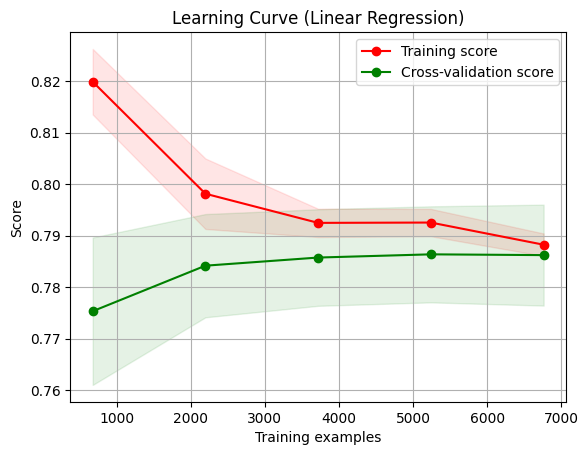

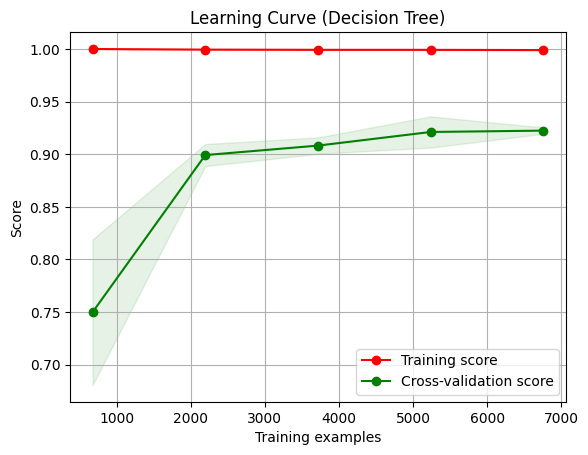

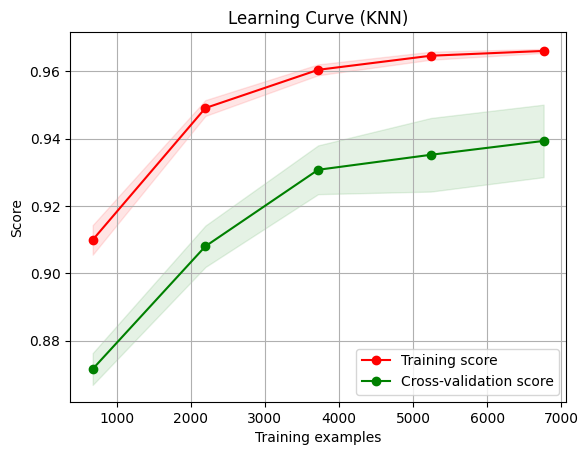

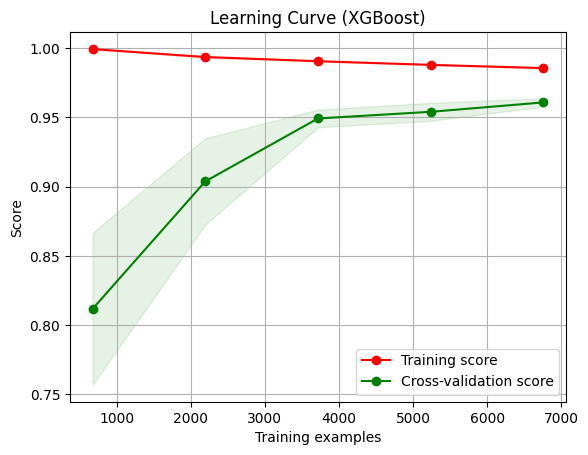

In [54]:
# prompt: tracer la courbes d'apprentissage du R2 score pour train/test

from sklearn.model_selection import learning_curve
import numpy as np

# Function to plot learning curves
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='r2'
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

import numpy as np

# Example usage for Linear Regression
plot_learning_curve(model, "Learning Curve (Linear Regression)", X_train_scaled, y_train, cv=5, n_jobs=4)
plt.show()

# Example usage for Decision Tree Regressor
plot_learning_curve(tree_model, "Learning Curve (Decision Tree)", X_train_scaled, y_train, cv=5, n_jobs=4)
plt.show()

# Example usage for KNN
plot_learning_curve(knn_model, "Learning Curve (KNN)", X_train_scaled, y_train, cv=5, n_jobs=4)
plt.show()

# Example usage for XGBoost
plot_learning_curve(xgb_model, "Learning Curve (XGBoost)", X_train_scaled, y_train, cv=5, n_jobs=4)
plt.show()


RMSE : Root Mean Squared Error (Ypred, Ytest)

In [55]:
# rmse of the xgboost model

rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print(f"XGBoost RMSE: {rmse_xgb}")


XGBoost RMSE: 2570.4760259531695


XGBoost RMSE: 2570.4760259531695

Si un vehicule coute 50000F
alors le prix predite est compris entre [50000-2570; 50000+2570]
C'est preferable si le rmse est resonnable (petit compare a 50K)